In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = torchvision.datasets.MNIST(
    root='.', train=True, transform=transforms.ToTensor(), download=True)

In [3]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
train_dataset.data.max()     # color의 마지막 Black = 255

tensor(255, dtype=torch.uint8)

In [5]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
test_dataset = torchvision.datasets.MNIST(
    root='.', train=False, transform=transforms.ToTensor(), download=True)
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [8]:
# Build the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,10))

# No need for final softmax!

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [11]:
# Data loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [12]:
[*zip(train_loader)][1]

([tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          ...,
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,

In [13]:
# Check out what the data loader does
# maps the values to (0,1)
# makes the data of shape (batch size, color, height, width)
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=1,
                                        shuffle=True)

for x, y in tmp_loader:
    print(x)
    print(x.shape)
    print(y.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1451, 0.7294, 1.0000, 0.8471, 0.2510, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
train_dataset.transform(train_dataset.data.numpy()).max()  # transform 이후에는 0:255 가 0:1로 normalize 된다

tensor(1.)

In [ ]:
# Train the model
n_epoches = 30

# Stuff to store
train_losses = np.zeros(n_epoches)
test_losses = np.zeros(n_epoches)

for it in range(n_epoches):
    train_loss = []
    for inputs, targets in train_loader:
        # move data to GPU
        inputs, targets = inputs.to(device), targets.to(device)
        
        # reshape the input
        inputs = inputs.view(-1, 784)   # -1 is given by sample numbers.
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        train_loss.append(loss.item())
    
    # Get train loss and test loss
    train_loss = np.mean(train_loss)   # a little misleading
    
    test_loss = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)   # -1 is given by sample numbers.
                
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)
    
    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    print(f'Epoch {it+1}/{n_epoches}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/30, Train Loss: 0.4107, Test Loss: 0.2220
Epoch 2/30, Train Loss: 0.1903, Test Loss: 0.1548
Epoch 3/30, Train Loss: 0.1385, Test Loss: 0.1263
Epoch 4/30, Train Loss: 0.1088, Test Loss: 0.1105
Epoch 5/30, Train Loss: 0.0873, Test Loss: 0.1053
Epoch 6/30, Train Loss: 0.0728, Test Loss: 0.0881
Epoch 7/30, Train Loss: 0.0619, Test Loss: 0.0801
Epoch 8/30, Train Loss: 0.0527, Test Loss: 0.0803
Epoch 9/30, Train Loss: 0.0448, Test Loss: 0.0742
Epoch 10/30, Train Loss: 0.0385, Test Loss: 0.0781
Epoch 11/30, Train Loss: 0.0336, Test Loss: 0.0836
Epoch 12/30, Train Loss: 0.0285, Test Loss: 0.0765
Epoch 13/30, Train Loss: 0.0254, Test Loss: 0.0753
Epoch 14/30, Train Loss: 0.0217, Test Loss: 0.0737
Epoch 15/30, Train Loss: 0.0182, Test Loss: 0.0759
Epoch 16/30, Train Loss: 0.0155, Test Loss: 0.0827
Epoch 17/30, Train Loss: 0.0138, Test Loss: 0.0785
Epoch 18/30, Train Loss: 0.0122, Test Loss: 0.0739


In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [30]:
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    
    # reshape the input
    inputs = inputs.view(-1, 784)
    #print(inputs.shape)
    
    # Forward pass
    outputs = model(inputs)
    #print(outputs.shape)
    
    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)      # _ : result value, predictions : max로 선택된 Digit index (logit function)
    # print(_, predictions)
    
    # update counts
    n_correct += (predictions == targets).sum().item()   # item : sum까지만 하면 출력이 tensor로 표현되므로 합산만 뽑아냄
    n_total += targets.shape[0]
    
train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    
    # reshape the input
    inputs = inputs.view(-1, 784)
    
    # Forward pass
    outputs = model(inputs)
    
    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)      # _ : result value, predictions : max로 선택된 Digit index (logit function)
    
    # update counts
    n_correct += (predictions == targets).sum().item()   # item : sum까지만 하면 출력이 tensor로 표현되므로 합산만 뽑아냄
    n_total += targets.shape[0]
    
test_acc = n_correct / n_total
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.9908, Test acc: 0.9761


In [52]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = dm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)    # color 부여
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  # Do these results make sense?
  # It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

Confusion matrix, without normalization
[[ 962    0    0    2    1    3    4    1    4    3]
 [   0 1124    4    0    0    1    2    1    3    0]
 [   4    2  999    9    1    0    2    5   10    0]
 [   0    0    0  995    0    3    0    5    4    3]
 [   0    0    1    1  962    0   11    1    1    5]
 [   2    0    0   10    1  870    2    0    5    2]
 [   2    2    2    1    1    3  946    0    1    0]
 [   1    4    9    5    1    0    0  992    9    7]
 [   1    0    2    6    2    4    1    3  954    1]
 [   2    5    0    9   14    8    1    3   10  957]]


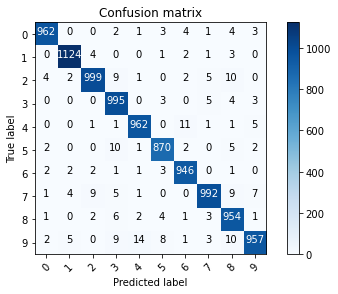

In [53]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])                   # p_test : prediction test

for inputs, targets in test_loader:
    # move data to GPU
    inputs = inputs.to(device)
    
    # reshape the input
    inputs = inputs.view(-1, 784)
    
    # Forward pass
    outputs = model(inputs)
    
    # Get prediction
    _, predictions = torch.max(outputs, 1)  
    
    # update p_test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))   # concatenate : 여러개의 array를 붙임
    #print(p_test)
    #p_test2 = np.array(predictions.cpu().numpy())    
    # p_test2와 같이 array를 바로 감쌀수도 있으나, 그러면 concatenate 처럼 For loop 동안에 발생한 모든 array를 붙일 수 없음
    #print(p_test2)
    
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

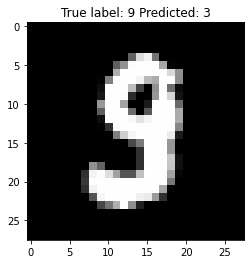

In [62]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (y_test[i], int(p_test[i])));    # ; 입력 후 warning comment가 사라짐